<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">   Topic Modeling </p> Taller en clase N° 2 </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

**Objetivo de la sesión**:

- Aplicar los conceptos de LDA-LSA y Word2Vec vistos en clase

- Utilizar software Python y librerías adecuadas para el procesamiento de los datos y aplicación de los algoritmos.

- Cargar la solución antes del día **martes 3 de octubre 6:00 p.m.** en aulas en los grupos de trabajo.

<FONT SIZE=4 COLOR="c8b6ff"> Elaborado por:
- <FONT SIZE=4 COLOR="c8b6ff"> 🧜‍♀️ Dafne Valeria Castellanos
- <FONT SIZE=4 COLOR="c8b6ff"> 🐺 Laura Valentina Gonzalez Rodriguez

## <FONT SIZE=5 COLOR="fb6f92"> Instalar e importar librerias

In [ ]:
!pip install -q stop-words pyLDAvis pandas==1.5.1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.


In [ ]:
# Manejo de datos
import pandas as pd

# Procesamiento de texto
import re
import nltk
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modelos con gensim
from gensim            import  corpora
from gensim.models     import  LsiModel
from gensim.models     import  LdaModel
from gensim.models     import  CoherenceModel
from gensim.models import Word2Vec
from gensim.matutils import Sparse2Corpus
import gensim

# Para graficar
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express    as px
import pyLDAvis
import pyLDAvis.gensim

# Para controlar los warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ImportWarning)

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
nltk.download('punkt')
print("El punkt tokenizer esta descargado")

El punkt tokenizer esta descargado


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# <FONT SIZE=8 COLOR="purple"> **Punto 1. Topic Modeling**

Considere el siguiente conjunto de datos

<FONT SIZE=4>

```python
pd.read_excel("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/textos.xlsx")
```

## <FONT SIZE=5 COLOR="fb6f92"> a. Cargar los datos Python

In [84]:
datos = pd.read_excel("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/textos.xlsx")
datos.head()

,COMENTARIO
0,"La Primera Guerra Mundial, también llamada la ..."
1,A principios del siglo XX se libró la guerra m...
2,"Conocida también como la Gran Guerra, la Prime..."
3,El término guerra mundial es utilizado para no...
4,La Gran Guerra tuvo lugar entre los años 1914 ...


## <FONT SIZE=5 COLOR="fb6f92">  b. Seleccionar la variable comentarios y hacer la normalización

*   Pasar a minúsculas
*   Eliminar caracteres especiales
*   Eliminar palabras de parada. Si considera que hay palabras que podría suprimir y que no estan en las stopwords, elimínelas.
etc.

In [ ]:
def cleanPLN(texto, idioma = "es"):
  # Pasar a minusculas
  texto = texto.lower()
  # Remover caracteres especiales y tildes
  texto = re.sub(r'[á]+', 'a', texto)
  texto = re.sub(r'[é]+', 'e', texto)
  texto = re.sub(r'[í]+', 'i', texto)
  texto = re.sub(r'[ó]+', 'o', texto)
  texto = re.sub(r'[úü]+', 'u', texto)
  texto = re.sub(r'[^A-Za-z\s]+', '', texto)
  texto = texto.replace('@', '').replace('#', '')
  # Tokenizar
  tokens = nltk.word_tokenize(texto)
  # Eliminar las stop.words y Dejar palabras con más de 3 caracteres
  stop_words=get_stop_words(idioma)
  tokens_clean = [palabras for palabras in tokens if len(palabras)>3 and (palabras not in stop_words)]
  # Regrese la cadena de texto simplificada.
  texto_limpio = ' '.join(tokens_clean)
  return texto_limpio

In [ ]:
datos['COMENTARIO'] = datos['COMENTARIO'].astype(str)
datos['COMENTARIO'] = datos['COMENTARIO'].apply(lambda x: cleanPLN(x,"es"))

## <FONT SIZE=5 COLOR="fb6f92"> c. Construir las matrices de Embedding con: Vector de frecuencias y TF+iDF

In [26]:
# Tokenización de los comentarios
datos["tokens"] = datos["COMENTARIO"].apply(lambda x: nltk.word_tokenize(x.lower()))

# Vector de frecuencias
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(datos["COMENTARIO"])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(datos["COMENTARIO"])

## <FONT SIZE=5 COLOR="fb6f92"> d. Para cada uno de las vectorizaciones anteriores, aplicar los métodos ***LDA*** y ***LSI*** y la coherencia para estimar un número de grupos adecuado de temas.

### <FONT SIZE=4 COLOR="00b4d8"> Preparación para el Análisis de Coherencia

In [60]:
# Obtén las palabras correspondientes a las características TF-IDF del vectorizador
feature_tfidf = tfidf_vectorizer.get_feature_names_out()

# Utiliza inverse_transform para obtener las palabras correspondientes a count_matrix
tfidf_list = [[feature_tfidf[index] for index in row.indices] for row in tfidf_matrix]

In [62]:
# Obtén las palabras correspondientes a las características TF-IDF del vectorizador
feature_count = count_vectorizer.get_feature_names_out()

# Utiliza inverse_transform para obtener las palabras correspondientes a count_matrix
count_list = [[feature_count[index] for index in row.indices] for row in count_matrix]

In [66]:
# Crear un diccionario a partir de las listas de palabras/tokenización
dictionary_tfidf = corpora.Dictionary(tfidf_list)
dictionary_count = corpora.Dictionary(count_list)

### <FONT SIZE=4 COLOR="00b4d8"> Coherencia LDA en TF-IDF

In [69]:
# Coherencia LDA en TF-IDF
sizes= [1,2,3,4,5,6,7,8]
cms =  [CoherenceModel(model= LdaModel(corpus=gensim.matutils.Sparse2Corpus(tfidf_matrix),
                                       num_topics=i,
                                       id2word=dictionary_tfidf,
                                       random_state = 0,
                                       passes = 10),
                       texts     = tfidf_list,
                       corpus    = gensim.matutils.Sparse2Corpus(tfidf_matrix),
                       coherence = 'c_v') for i in range(1, len(sizes)+1)]

coherences = [cm.get_coherence() for cm in cms]

print("-------------------------------------------------------")

r = [f"Coherencia LDA en TF-IDF con {sz} temas: {c}"
       for sz, c in zip(sizes, coherences)]

print(*r, sep="\n")

x = range(1, len(sizes)+1)

fig = px.line(x=x, y=coherences, labels={"x": "num_topics", "y": "Coherence score"})
fig.update_traces(name="coherence_values")
fig.update_layout(legend=dict(x=0.7, y=1))  # Ajusta la posición de la leyenda
fig.update_layout(title="Coherencia LDA en TF-IDF vs núm. de temas")
fig.show()

-------------------------------------------------------
Coherencia LDA en TF-IDF con 1 temas: 0.43379354075327325
Coherencia LDA en TF-IDF con 2 temas: 0.4134949741460013
Coherencia LDA en TF-IDF con 3 temas: 0.4666749241209475
Coherencia LDA en TF-IDF con 4 temas: 0.4682361972316713
Coherencia LDA en TF-IDF con 5 temas: 0.4652911038807533
Coherencia LDA en TF-IDF con 6 temas: 0.48271721804893625
Coherencia LDA en TF-IDF con 7 temas: 0.47824754317042234
Coherencia LDA en TF-IDF con 8 temas: 0.47531292301583855


Al realizar un análisis de los resultados obtenidos al aplicar el modelo Latent Dirichlet Allocation (LDA) a una vectorización TF-IDF de nuestros documentos, observamos que el modelo LDA con la máxima coherencia se obtuvo al seleccionar **seis temas**. Esta conclusión sugiere que, según las métricas de coherencia utilizadas, **seis temas** proporcionan la explicación más coherente de la estructura temática subyacente en nuestros datos.



### <FONT SIZE=4 COLOR="00b4d8"> Coherencia LDA en Count Vectorizer

In [70]:
# Coherencia LDA en matriz de frecuencias

sizes= [1,2,3,4,5,6,7,8]
cms =  [CoherenceModel(model= LdaModel(corpus=gensim.matutils.Sparse2Corpus(count_matrix),
                                       num_topics=i,
                                       id2word=dictionary_count,
                                       random_state = 0,
                                       passes = 10),
                       texts     = count_list,
                       corpus    = gensim.matutils.Sparse2Corpus(count_matrix),
                       coherence = 'c_v') for i in range(1, len(sizes)+1)]

coherences = [cm.get_coherence() for cm in cms]

print("-------------------------------------------------------")

r = [f"Coherencia LDA en matriz de frecuencias con {sz} temas: {c}"
       for sz, c in zip(sizes, coherences)]

print(*r, sep="\n")

x = range(1, len(sizes)+1)

fig = px.line(x=x, y=coherences, labels={"x": "num_topics", "y": "Coherence score"})
fig.update_traces(name="coherence_values")
fig.update_layout(legend=dict(x=0.7, y=1))  # Ajusta la posición de la leyenda
fig.update_layout(title="Coherencia LDA en matriz de frecuencias vs núm. de temas")
fig.show()

-------------------------------------------------------
Coherencia LDA en matriz de frecuencias con 1 temas: 0.4253265413927621
Coherencia LDA en matriz de frecuencias con 2 temas: 0.41818876930151005
Coherencia LDA en matriz de frecuencias con 3 temas: 0.4964431713073094
Coherencia LDA en matriz de frecuencias con 4 temas: 0.48689550794609954
Coherencia LDA en matriz de frecuencias con 5 temas: 0.47445876163549394
Coherencia LDA en matriz de frecuencias con 6 temas: 0.46506252412690413
Coherencia LDA en matriz de frecuencias con 7 temas: 0.48182956219737844
Coherencia LDA en matriz de frecuencias con 8 temas: 0.46217915314394975


Al analizar los resultados de la coherencia obtenida al aplicar el modelo Latent Dirichlet Allocation (LDA) a una matriz de frecuencias de nuestros documentos, notamos que se obtuvo la máxima coherencia cuando seleccionamos **3 temas** específicos. Este resultado sugiere que, de acuerdo con la métrica de coherencia utilizada, la representación más coherente de la estructura temática subyacente en nuestros datos se logra al dividir nuestros documentos en exactamente **3 temas**.

### <FONT SIZE=4 COLOR="00b4d8"> Coherencia LSI en TF-IDF



In [33]:
# Coherencia LSI en TF-IDF

sizes= [1,2,3,4,5,6,7,8]
cms =  [CoherenceModel(model= LsiModel(corpus=gensim.matutils.Sparse2Corpus(tfidf_matrix),
                                       num_topics=i,
                                       id2word=dictionary_tfidf,
                                       random_seed = 0),
                       texts     = tfidf_list,
                       corpus    = gensim.matutils.Sparse2Corpus(tfidf_matrix),
                       coherence = 'c_v') for i in range(1, len(sizes)+1)]

coherences = [cm.get_coherence() for cm in cms]

print("-------------------------------------------------------")

r = [f"Coherencia LSI en TF-IDF con {sz} temas: {c}"
       for sz, c in zip(sizes, coherences)]

print(*r, sep="\n")

x = range(1, len(sizes)+1)

fig = px.line(x=x, y=coherences, labels={"x": "num_topics", "y": "Coherence score"})
fig.update_traces(name="coherence_values")
fig.update_layout(legend=dict(x=0.7, y=1))  # Ajusta la posición de la leyenda
fig.update_layout(title="Coherencia LSI en TF-IDF vs núm. de temas")
fig.show()

-------------------------------------------------------
Coherencia LSI en TF-IDF con 1 temas: 0.6663989678959267
Coherencia LSI en TF-IDF con 2 temas: 0.4850628367441119
Coherencia LSI en TF-IDF con 3 temas: 0.6375068737473173
Coherencia LSI en TF-IDF con 4 temas: 0.4878198048373805
Coherencia LSI en TF-IDF con 5 temas: 0.45489667824048335
Coherencia LSI en TF-IDF con 6 temas: 0.5463581711917685
Coherencia LSI en TF-IDF con 7 temas: 0.5095748525043848


Tras analizar los resultados de la coherencia obtenida al aplicar el modelo Latent Semantic Indexing (LSI) a la vectorización TF-IDF de nuestros documentos, es evidente que la máxima coherencia se alcanzó al seleccionar **un solo tema**. Este hallazgo sugiere que, según la métrica de coherencia utilizada, **un solo tema** proporciona la explicación más coherente de la estructura semántica subyacente en nuestros datos en el contexto de la vectorización TF-IDF.

### <FONT SIZE=4 COLOR="00b4d8"> Coherencia LSI en Count Vectorizer

In [34]:
# Coherencia LSI en matriz de frecuencias

sizes= [1,2,3,4,5,6,7,8]
cms =  [CoherenceModel(model= LsiModel(corpus=gensim.matutils.Sparse2Corpus(count_matrix),
                                       num_topics=i,
                                       id2word=dictionary_count,
                                       random_seed = 0),
                       texts     = count_list,
                       corpus    = gensim.matutils.Sparse2Corpus(count_matrix),
                       coherence = 'c_v') for i in range(1, len(sizes)+1)]

coherences = [cm.get_coherence() for cm in cms]

print("-------------------------------------------------------")

r = [f"Coherencia LSI en matriz de frecuencias con {sz} temas: {c}"
       for sz, c in zip(sizes, coherences)]

print(*r, sep="\n")

x = range(1, len(sizes)+1)

fig = px.line(x=x, y=coherences, labels={"x": "num_topics", "y": "Coherence score"})
fig.update_traces(name="coherence_values")
fig.update_layout(legend=dict(x=0.7, y=1))  # Ajusta la posición de la leyenda
fig.update_layout(title="Coherencia LSI en matriz de frecuencias vs núm. de temas")
fig.show()

-------------------------------------------------------
Coherencia LSI en matriz de frecuencias con 1 temas: 0.5322789471276959
Coherencia LSI en matriz de frecuencias con 2 temas: 0.64223905850716
Coherencia LSI en matriz de frecuencias con 3 temas: 0.3548484196979473
Coherencia LSI en matriz de frecuencias con 4 temas: 0.4770492904970374
Coherencia LSI en matriz de frecuencias con 5 temas: 0.4093460127601811
Coherencia LSI en matriz de frecuencias con 6 temas: 0.5105805028792971
Coherencia LSI en matriz de frecuencias con 7 temas: 0.49568602112140064


Al analizar los resultados de la coherencia obtenida al aplicar el modelo Latent Semantic Indexing (LSI) a una matriz de frecuencias de nuestros documentos, observamos que se logró la máxima coherencia al seleccionar **2 temas** específicos. Este descubrimiento sugiere que, según la métrica de coherencia utilizada, la representación más coherente de la estructura semántica subyacente en nuestros datos se obtiene al dividir nuestros documentos en exactamente **2 temas**.

## <FONT SIZE=5 COLOR="fb6f92"> e. Realizar el gráfico de LDA. Interpretar.

### <FONT SIZE=4 COLOR="00b4d8"> Diagrama LDA en TF-IDF

In [76]:
# LDA en TF-IDF
lda_tfidf =  LdaModel(corpus=gensim.matutils.Sparse2Corpus(tfidf_matrix),
                      num_topics=6,
                      id2word=dictionary_tfidf,
                      random_state = 0,
                      passes = 10)

In [74]:
vis = pyLDAvis.gensim.prepare(topic_model = lda_tfidf,                                     # modelo
                              corpus = gensim.matutils.Sparse2Corpus(tfidf_matrix),        # corpus
                              dictionary = dictionary_tfidf,                               # diccionario de gensim
                              R = 10)                                                      # número de palabras claves
pyLDAvis.display(vis)

In [81]:
for i in range(6):
    print('\nTopic {i}'.format(i=i+1))
    lista_temas = [dictionary_tfidf.id2token[term[0]] for term in lda_tfidf.get_topic_terms(i)[0:5]]
    print(lista_temas)


Topic 1
['conocida', 'razones', 'union', 'enfrentamiento', 'cruenta']

Topic 2
['libro', 'principios', 'diccionarios', 'reivindicaciones', 'termino']

Topic 3
['continente', 'practicamente', 'especializada', 'letales', 'siglo']

Topic 4
['aliados', 'momento', 'tambien', 'militar', 'conflicto']

Topic 5
['extendio', 'tierra', 'italia', 'utilizado', 'encyclopdia']

Topic 6
['museo', 'seno', 'guerra', 'totalidad', 'internacional']


Basándonos en las palabras clave identificadas para cada uno de los 6 temas en tu modelo de LDA (Latent Dirichlet Allocation) aplicado a los documentos representados mediante TF-IDF, podemos inferir algunas conclusiones generales:

1. **Tema 1 - Conflicto y Enfrentamiento**: Este tema parece estar relacionado con palabras como "conocida", "razones", "enfrentamiento" y "cruenta", lo que sugiere una discusión sobre conflictos conocidos o históricos.

2. **Tema 2 - Libros y Diccionarios**: Palabras clave como "libro", "principios" y "diccionarios" sugieren que este tema podría estar relacionado con la literatura, la escritura y los recursos de referencia.

3. **Tema 3 - Siglo y Continente**: Este tema podría estar relacionado con eventos históricos o geografía, ya que incluye palabras como "continente", "siglo" y "especializada".

4. **Tema 4 - Aliados y Conflicto Militar**: Las palabras clave aquí, como "aliados", "momento" y "conflicto militar", sugieren una discusión sobre eventos militares y alianzas.

5. **Tema 5 - Italia y Tierra**: Este tema parece estar relacionado con lugares geográficos como "Italia" y "tierra", posiblemente discutiendo la historia o la geografía de una región específica.

6. **Tema 6 - Museos y Guerra**: Las palabras clave "museo", "guerra" y "internacional" sugieren un tema que podría estar relacionado con la historia de museos en el contexto de conflictos internacionales.

### <FONT SIZE=4 COLOR="00b4d8"> Diagrama LDA en Count

In [ ]:
# LDA en Count Vectorizer
lda_count = LdaModel(corpus=gensim.matutils.Sparse2Corpus(count_matrix),
                    num_topics=3,
                    id2word=dictionary_count,
                    random_state = 0,
                    passes = 10)

In [77]:
vis = pyLDAvis.gensim.prepare(topic_model = lda_count,                                     # modelo
                              corpus = gensim.matutils.Sparse2Corpus(count_matrix),        # corpus
                              dictionary = dictionary_count,                               # diccionario de gensim
                              R = 10)                                                      # número de palabras claves
pyLDAvis.display(vis)

In [82]:
for i in range(3):
    print('\nTopic {i}'.format(i=i+1))
    lista_temas = [dictionary_count.id2token[term[0]] for term in lda_count.get_topic_terms(i)[0:5]]
    print(lista_temas)


Topic 1
['extendio', 'aliados', 'enfrentamiento', 'razones', 'conflicto']

Topic 2
['libro', 'diccionarios', 'principios', 'reivindicaciones', 'tierra']

Topic 3
['practicamente', 'continente', 'especializada', 'principales', 'totalidad']


Basándonos en las palabras clave identificadas para cada uno de los 3 temas en tu modelo de LDA aplicado a los documentos representados mediante Count Vectorizer, podemos inferir algunas conclusiones generales:

1. **Tema 1 - Conflicto y Alianzas**: Este tema parece estar relacionado con palabras como "aliados", "enfrentamiento", "razones" y "conflicto", lo que sugiere una discusión sobre conflictos y alianzas en algún contexto.

2. **Tema 2 - Literatura y Recursos de Referencia**: Las palabras clave aquí, como "libro", "diccionarios", "principios" y "tierra", sugieren un tema relacionado con la literatura, la escritura y los recursos de referencia, posiblemente en el contexto de la tierra.

3. **Tema 3 - Continente y Especialización**: Este tema podría estar relacionado con palabras como "continente", "practicamente", "especializada" y "principales", lo que sugiere una discusión sobre continentes y especializaciones en algún contexto.

# <FONT SIZE=8 COLOR="purple"> **Punto 2. Word2Vec**

Seleccionar uno de los conjuntos de *reviews* de Amazon.

https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Se selecciono el conjunto de datos de Software.



## <FONT SIZE=5 COLOR="fb6f92"> a. Cargar los datos Python

In [ ]:
software = pd.read_json("Software.json.gz", lines=True)
software.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


## <FONT SIZE=5 COLOR="fb6f92"> b. Limpiar la variable *reviewText*. Normalizar.


In [ ]:
# Eliminar filas vacias en nuestra columna de interes
software = software[software['reviewText'] !='']
software = software.dropna(subset=['reviewText'])
# Normalizar el texto
software['reviewText'] = software['reviewText'].astype(str)
software['reviewText'] = software['reviewText'].apply(lambda x: x.lower())
# Visualizar el dataset normalizado
software.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,the materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,i am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"if you are taking this class don""t waste your ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,this book was missing pages!!! important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,i have used learnsmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


## <FONT SIZE=5 COLOR="fb6f92"> c. Tokenizar y aplicar *Word2Vec*.


In [ ]:
# Convertir los review en una cadena e imprimimos la longitud
software_corpus = ''.join(software['reviewText']+" ")
print("El corpus contiene {0:,} caracteres".format(len(software_corpus)))

El corpus contiene 197,990,167 caracteres


In [ ]:
# Cargar el tokenizados
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("El punkt tokenizer está cargado")
# Vamos a tokenizar en sentencias.
software_sentences = tokenizer.tokenize(software_corpus)
print("Tenemos {0:,} sentencias".format(len(software_sentences)))

El punkt tokenizer está cargado
Tenemos 2,212,983 sentencias


In [ ]:
# Limpiar y dividie las sentencias en palabras.
def clean_and_split_str(string):
    string = string.lower()
    patron = re.compile("[^A-Za-z]+")
    string = re.sub(patron, " ", string)
    return string.strip().split()

In [ ]:
# Limpiar y construir la lista de sentencias
sentencias = []
for sent in software_sentences:
    if len(sent) > 0:
        sentencias.append(clean_and_split_str(sent))
print("Tenemos {0:,} sentences".format(len(sentencias)))

Tenemos 2,212,983 sentences


In [ ]:
#Revisar algunos valores
print(f"software_sentences: \n{software_sentences[1]}\nsentencias:\n{sentencias[1]}")

software_sentences: 
however for the money spent they really should've come with a binder and not just loose leaf.
sentencias:
['however', 'for', 'the', 'money', 'spent', 'they', 'really', 'should', 've', 'come', 'with', 'a', 'binder', 'and', 'not', 'just', 'loose', 'leaf']


In [ ]:
toke_count = sum([len(sentence) for sentence in sentencias])
print("El corpus contiene {0:,} tokens".format(toke_count))

El corpus contiene 36,000,501 tokens


## <FONT SIZE=5 COLOR="fb6f92"> d. Guardar el modelo.


In [ ]:
word2vect = Word2Vec(sentencias, min_count=2)
word2vect.save("sofware.model.w2v")
print("Modelo guardado")

Modelo guardado


## <FONT SIZE=5 COLOR="fb6f92"> e. Mostrar algunos ejemplos de la similitud de palabras con base al contexto de los datos. Interprete.

In [ ]:
# Revisemos la similitud de algunas palabras
sim_words = word2vect.wv.most_similar('software')
sim_words

[('program', 0.8791258335113525),
 ('product', 0.8238784670829773),
 ('sw', 0.7693262100219727),
 ('sofware', 0.7660134434700012),
 ('programme', 0.727217435836792),
 ('application', 0.671792209148407),
 ('package', 0.6706631183624268),
 ('app', 0.6123654246330261),
 ('progam', 0.6067441701889038),
 ('programs', 0.593991756439209)]

In [ ]:
# Revisemos la similitud de algunas palabras
sim_words = word2vect.wv.most_similar('money')
sim_words

[('bucks', 0.6593495607376099),
 ('monies', 0.6568604707717896),
 ('cash', 0.6396954655647278),
 ('mony', 0.6050664782524109),
 ('dollars', 0.5991297364234924),
 ('dough', 0.582028329372406),
 ('buck', 0.5584408044815063),
 ('moneys', 0.5422555208206177),
 ('dime', 0.5068961977958679),
 ('fortune', 0.5010502934455872)]

In [ ]:
# Revisemos la similitud de algunas palabras
sim_words = word2vect.wv.most_similar('class')
sim_words

[('freshman', 0.580315351486206),
 ('college', 0.5571534037590027),
 ('classes', 0.5531085133552551),
 ('attending', 0.5511676669120789),
 ('phd', 0.5276470184326172),
 ('semester', 0.5258910059928894),
 ('certification', 0.5099459290504456),
 ('seminar', 0.5086259245872498),
 ('nursing', 0.50191330909729),
 ('graduate', 0.5014583468437195)]

In [ ]:
# Revisemos la similitud de algunas palabras
sim_words = word2vect.wv.most_similar('pc')
sim_words

[('computer', 0.8709640502929688),
 ('machine', 0.8339188098907471),
 ('laptop', 0.8108029365539551),
 ('computers', 0.7286906242370605),
 ('pcs', 0.7126100063323975),
 ('comp', 0.7068321108818054),
 ('netbook', 0.7015453577041626),
 ('imac', 0.6898019313812256),
 ('desktop', 0.6882569789886475),
 ('macbookpro', 0.6755573153495789)]

In [ ]:
print("Similitud entre program y good:", word2vect.wv.similarity("program", "good"))
print("Similitud entre class y love:", word2vect.wv.similarity("class", "love"))
print("Similitud entre windows y mac:", word2vect.wv.similarity("windows", "mac"))

Similitud entre program y good: -0.09601161
Similitud entre class y love: 0.10636616
Similitud entre windows y mac: 0.6514542


In [ ]:
terminos = 'class taking computer product'.split()

for t in terminos:
    print(t, '==>', word2vect.wv.most_similar(t), '\n')

class ==> [('freshman', 0.580315351486206), ('college', 0.5571534037590027), ('classes', 0.5531085133552551), ('attending', 0.5511676669120789), ('phd', 0.5276470184326172), ('semester', 0.5258910059928894), ('certification', 0.5099459290504456), ('seminar', 0.5086259245872498), ('nursing', 0.50191330909729), ('graduate', 0.5014583468437195)] 

taking ==> [('taken', 0.6346864104270935), ('take', 0.6172237396240234), ('holding', 0.6085664629936218), ('takes', 0.5870391130447388), ('took', 0.5750268697738647), ('throwing', 0.5713704824447632), ('passing', 0.5693404674530029), ('bringing', 0.5645109415054321), ('giving', 0.5213621854782104), ('putting', 0.5166571736335754)] 

computer ==> [('machine', 0.8906834721565247), ('pc', 0.8709640502929688), ('laptop', 0.8358384370803833), ('comp', 0.772347092628479), ('computor', 0.7691171765327454), ('puter', 0.7622724771499634), ('system', 0.7350722551345825), ('computers', 0.694746732711792), ('harddrive', 0.6428454518318176), ('imac', 0.64270

## <FONT SIZE=5 COLOR="fb6f92"> f. Seleccionar una muestra de 10.000 registros normalizados. Hacer la tabla de frecuencia del top 10. Hacer una nube de palabras e interpretar.


In [ ]:
# Seleccionar la muestra
sample_size = 10000
software_sample = software.sample(sample_size, random_state=0)

In [ ]:
# Tokenizar el texto y contar las frecuencias de las palabras
software_sample['reviewText'] = software_sample['reviewText'].apply(lambda x: cleanPLN(x,'en'))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(software_sample['reviewText'])

In [ ]:
# Obtener las palabras más frecuentes
word_freq = list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]

In [ ]:
# Crear la tabla de las palabras y sus frecuencias
software_freq = pd.DataFrame(word_freq, columns=['Palabra', 'Frecuencia'])
software_freq.head(10)

,Palabra,Frecuencia
0,software,3869
1,product,3080
2,program,3036
3,will,2549
4,version,2470
5,just,2294
6,like,2250
7,windows,2107
8,time,2092
9,great,1983


In [ ]:
# Crear una nube de palabras con las frecuencias
wordcloud_data = dict(word_freq)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

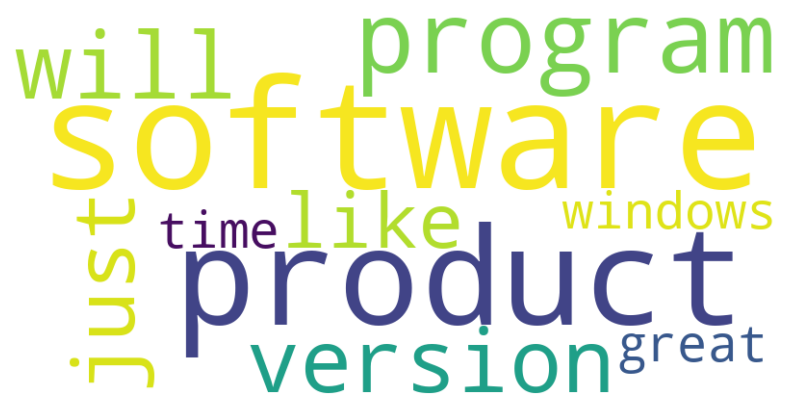

In [ ]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# <FONT SIZE=5 COLOR="purple"> Punto 3. Conclusiones y Bibliografía </FONT>

<FONT SIZE=4 COLOR="fb6f92"> Conclusiones


En este ejercicio, se llevó a cabo un riguroso proceso de análisis de texto que abarcó desde la carga de datos hasta la visualización de resultados. La fase inicial de carga y normalización de datos fue esencial para garantizar la calidad y uniformidad de la información con la que trabajamos. La construcción de matrices de embedding utilizando Count Vectorizer y TF+iDF nos permitió transformar el texto en representaciones numéricas, facilitando así un análisis más profundo.

Uno de los aspectos más destacados fue la realización de análisis de coherencia mediante modelos LDA y LSI, lo que nos permitió identificar el número óptimo de temas en los datos. Los gráficos de coherencia en función del número de temas ayudaron a encontrar un equilibrio entre la complejidad y la interpretabilidad de los modelos. Además, la visualización interactiva de los resultados de LDA a través de pyLDAvis proporcionó una herramienta poderosa para explorar la estructura de temas de manera intuitiva. En conjunto, estos hallazgos permiten una comprensión más profunda de los datos textuales y ofrecen una base sólida para futuras investigaciones o decisiones basadas en el análisis de texto.


Por otro lado, Word2Vec es una poderosa técnica que convierte palabras en vectores numéricos densos en un espacio vectorial de alta dimensión, lo que permite capturar de manera efectiva el significado y contexto de las palabras. Su eficiencia en el entrenamiento y almacenamiento de modelos lo hace adecuado para el procesamiento de grandes conjuntos de datos y un amplio vocabulario.

Esta técnica va más allá de la simple representación de palabras, ya que es capaz de capturar relaciones semánticas entre ellas. Utiliza información contextual en el corpus de texto para aprender representaciones vectoriales, de modo que las similitudes geométricas en el espacio vectorial reflejan relaciones semánticas entre palabras, como se ejemplifica con la proximidad entre "program" y "product" frente a "program" y "good”, una relación bastante acertada de 0.8 a -0.1.

Adicionalmente, pudimos utilizar la herramienta 'Count Vectorizer' para identificar las palabras más frecuentes en el corpus, destacando que palabras como "software," "product," y "program" son las más recurrentes. Esta visualización proporciona una perspectiva valiosa sobre el contenido del texto.

<FONT SIZE=4 COLOR="fb6f92"> Referencias

Gensim: Latent Dirichlet Allocation. (2022). Radimrehurek.com. https://radimrehurek.com/gensim/models/ldamodel.html

Gensim: Latent Semantic Indexing. (2022). Radimrehurek.com. https://radimrehurek.com/gensim/models/lsimodel.html

Gensim: Word2vec embeddings. (2022). Radimrehurek.com. https://radimrehurek.com/gensim/models/word2vec.html